## Big Mart Sales Prediction

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and predict the sales of each product at a particular outlet.

The solution is divided into the following sections: 
- Data understanding and exploration (EDA)
- Data Preprocessing
- Model building and evaluation
- Predictions


### 1. Data Understanding and Analysis or (EDA)

Let's first have a look at the dataset and understand the size, attribute names etc.

In [1]:
# importing neccessary libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading datasets
train = pd.read_csv('C:/Users/Mohan/Downloads/train_v9rqX0R (1).csv')
test = pd.read_csv('C:/Users/Mohan/Downloads/test_AbJTz2l (1).csv')
ss = pd.read_csv('C:/Users/Mohan/Downloads/sample_submission_8RXa3c6 (1).csv')

In [3]:
# no.of data points and features
train.shape, test.shape, ss.shape

((8523, 12), (5681, 11), (5681, 3))

In [4]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
# getting information of the train dataset: 8523 rows, 12 columns, null values in 2 cols Item_weight and  Outlet_Size
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# statistical summary of train dataset
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [8]:
# unique values in dataset
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [9]:
test.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [10]:
# summary of the test dataset: 5681 rows, 11 columns, null values in 2 cols Item_weight and Outlet_Size
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
test.isna().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [12]:
test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

In [13]:
ss

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1000
1,FDW14,OUT017,1000
2,NCN55,OUT010,1000
3,FDQ58,OUT017,1000
4,FDY38,OUT027,1000
...,...,...,...
5676,FDB58,OUT046,1000
5677,FDD47,OUT018,1000
5678,NCO17,OUT045,1000
5679,FDJ26,OUT017,1000


### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

   &emsp; &emsp; **Variable**	       &emsp; &emsp;  &emsp; &emsp; &emsp;     **Description**
   - Item_Identifier &emsp; &nbsp; &emsp;  &emsp; &emsp;&emsp; &emsp; :    Unique product ID
   - Item_Weight  &nbsp;&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;:Weight of product
   - Item_Fat_Content &nbsp; &emsp; &emsp; &emsp; &emsp; &emsp;: Whether the product is low fat or not
   - Item_Visibility  &emsp; &emsp;&emsp; &emsp; &emsp; &emsp; &emsp;:    The % of total display area of all products in a store allocated to the particular product
   - Item_Type &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;:    The category to which the product belongs
   - Item_MRP &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;:Maximum Retail Price (list price) of the product
   - Outlet_Identifier &emsp; &emsp; &emsp; &emsp; &emsp; :    Unique store ID
   - Outlet_Establishment_Year  &emsp;:	The year in which store was established
   - Outlet_Size &emsp;  &emsp;&emsp; &emsp; &emsp; &emsp; &emsp;:   	The size of the store in terms of ground area covered
   - Outlet_Location_Type  &emsp; &emsp;&emsp; &emsp;:The type of city in which the store is located
   - Outlet_Type &emsp; &emsp;&emsp; &emsp; &emsp;  &emsp;&emsp;:Whether the outlet is just a grocery store or some sort of supermarket
   - Item_Outlet_Sales &emsp; &emsp;&emsp; &emsp; &emsp;:Sales of the product in the particular store. This is the outcome variable to be predicted.

In [14]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Numerical features

C:\Users\Mohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


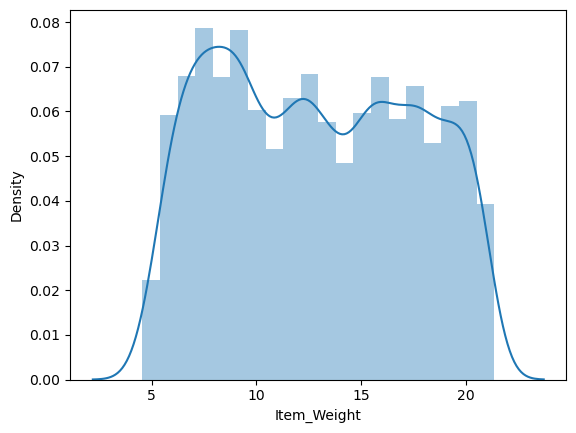

In [15]:
# item weight: Weight of product
sns.distplot(train['Item_Weight'])
plt.show()

C:\Users\Mohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


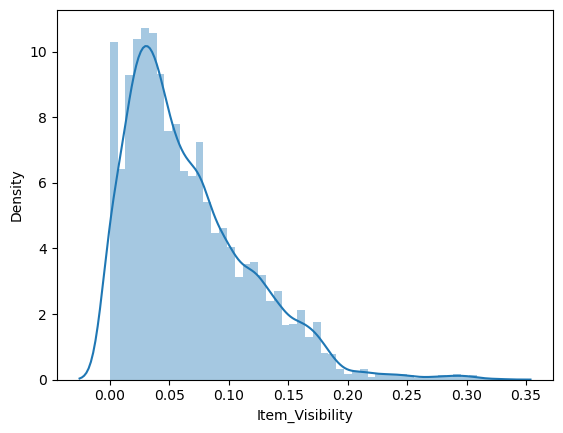

In [16]:
# item visisbility: The % of total display area of all products in a store allocated to the particular product
sns.distplot(train['Item_Visibility'])
plt.show()

Here, so many products takes item visibility values as zero which is impossible. We will handle it later

C:\Users\Mohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


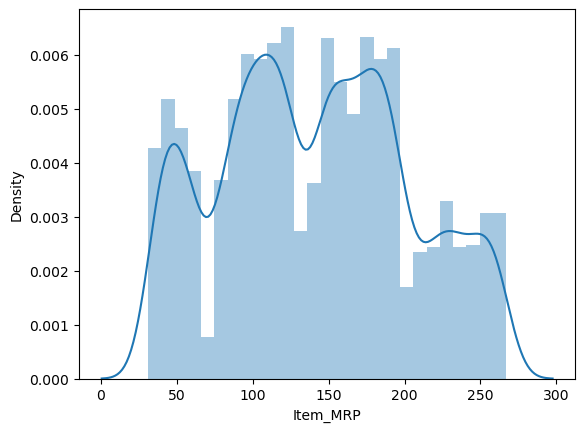

In [17]:
# Item_MRP: Maximum Retail Price (list price) of the product
sns.distplot(train['Item_MRP'])
plt.show()

C:\Users\Mohan\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


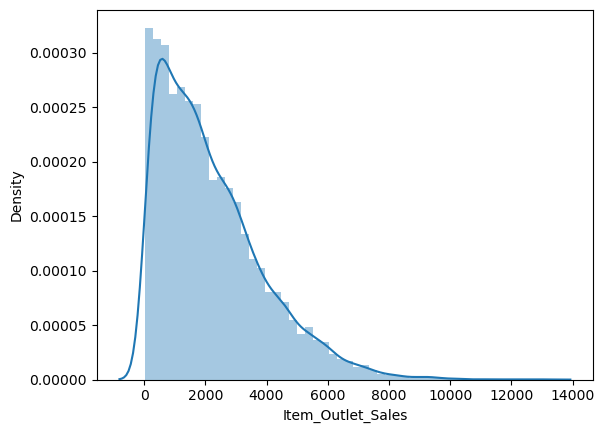

In [18]:
# Item_Outlet_Sales:  Sales of the product in the particular store. This is the outcome variable to be predicted.
sns.distplot(train['Item_Outlet_Sales'])
plt.show()

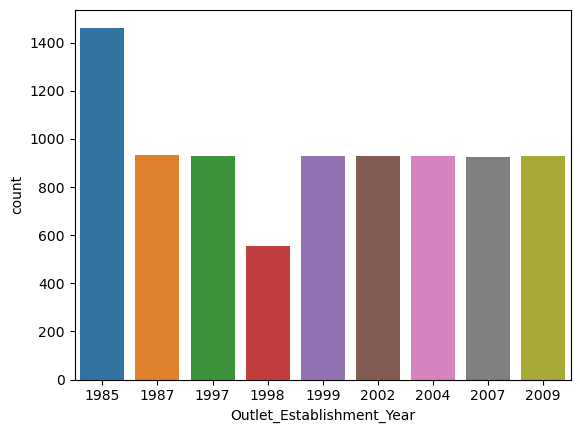

In [19]:
sns.countplot(x='Outlet_Establishment_Year', data=train)
plt.show()

### Categorical features

In [20]:
# Whether the product is low fat or not    - here values are getting repeated or duplicated
train['Item_Fat_Content'].astype('category').value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

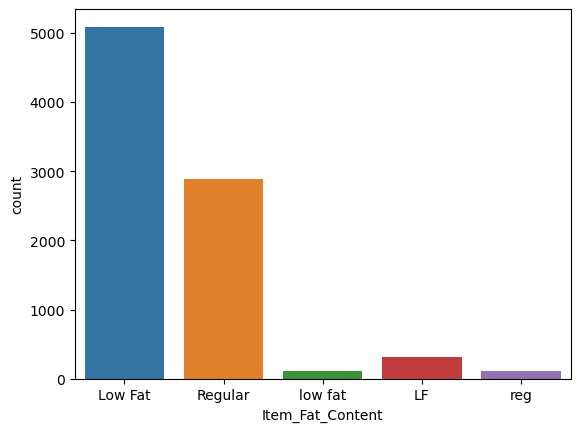

In [21]:
sns.countplot(x='Item_Fat_Content', data=train)
plt.show()

In [22]:
train['Item_Type'].astype('category').value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

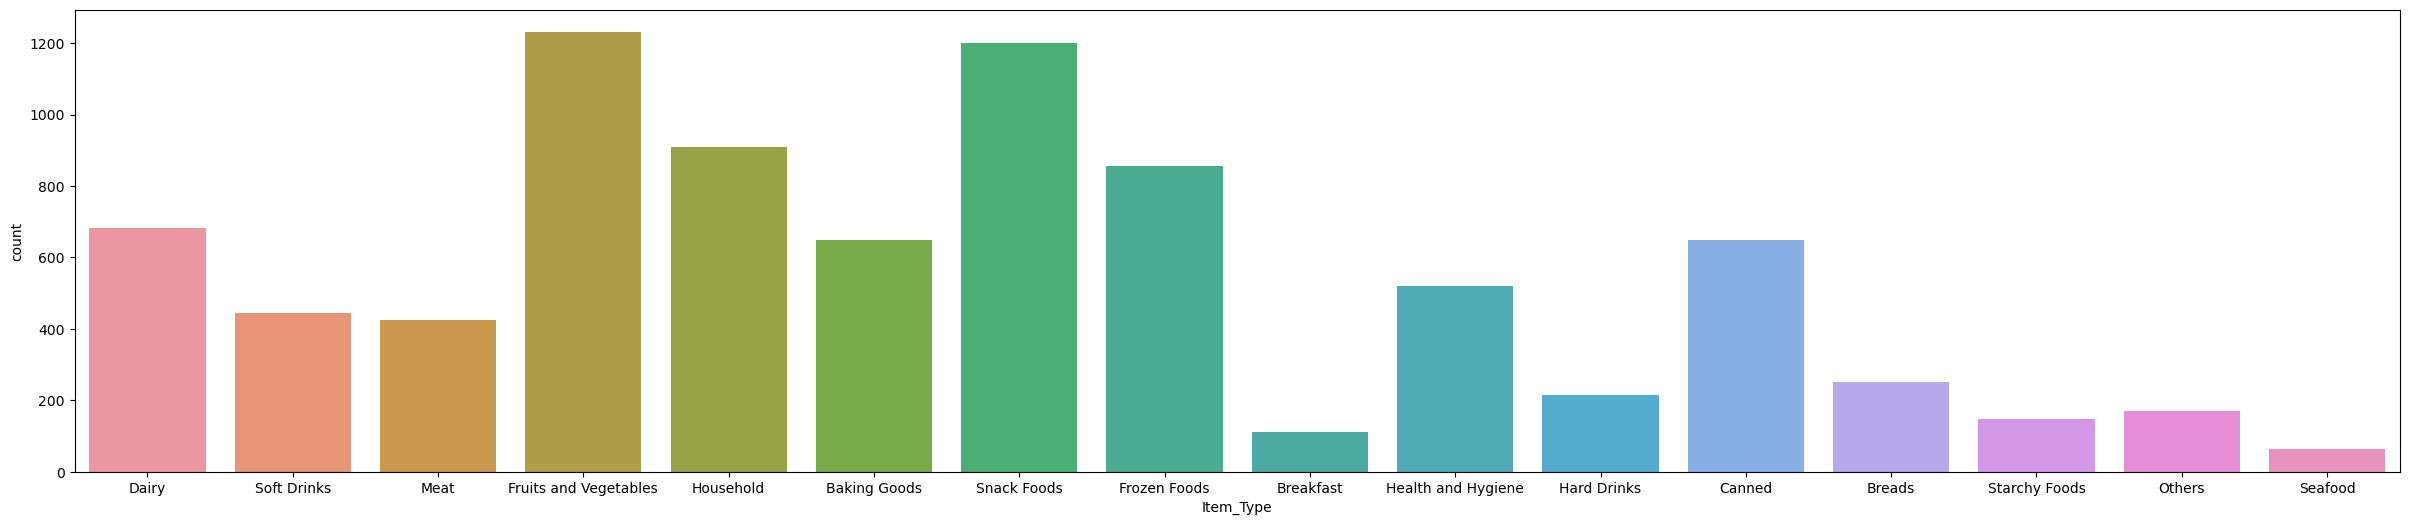

In [23]:
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=train)
plt.show()

In [24]:
# outlet size : medium, small or high
train['Outlet_Size'].astype('category').value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

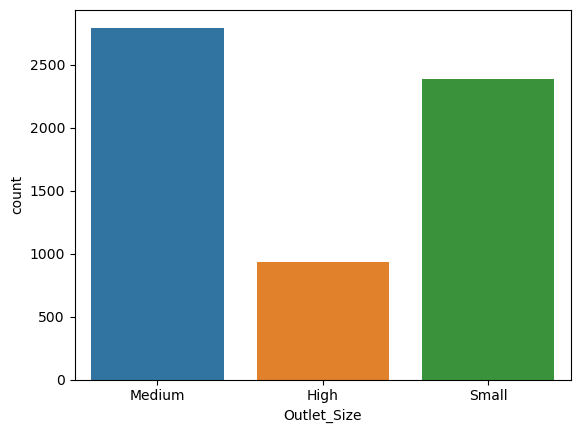

In [25]:
sns.countplot(x='Outlet_Size', data=train)
plt.show()

In [26]:
# outlet type: grocery, supermarket type 1, SM type 2 or SM type 3
train['Outlet_Type'].astype('category').value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

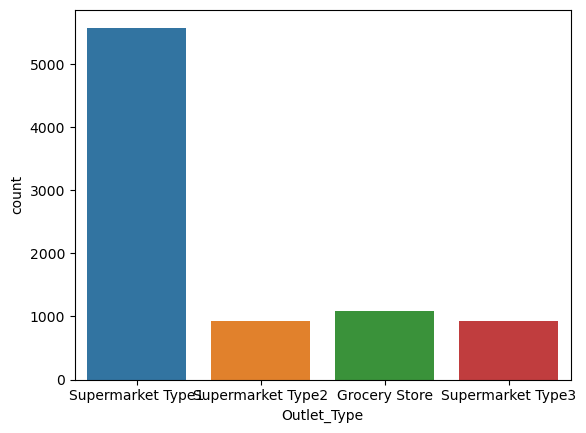

In [27]:
sns.countplot(x='Outlet_Type', data=train)
plt.show()

In [28]:
# outlet location type: tier 3 or 2 or 1
train['Outlet_Location_Type'].astype('category').value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

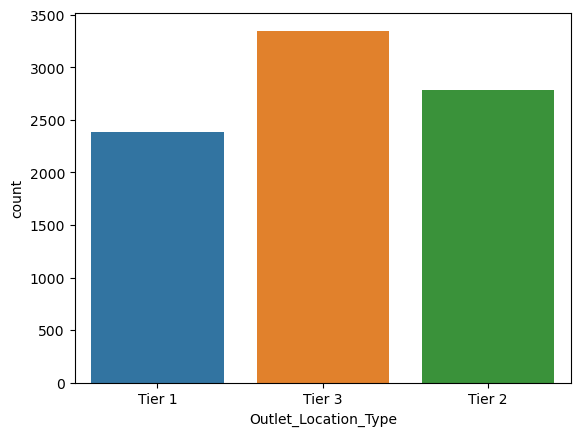

In [29]:
sns.countplot(x='Outlet_Location_Type', data=train)
plt.show()

## 2. Data Preprocessing

### Handling duplicates

In [30]:
train.loc[(train['Item_Fat_Content'] == "LF") | 
        (train['Item_Fat_Content']  == "low fat")
         , 'Item_Fat_Content'] = 'Low Fat'

In [31]:
train.loc[train['Item_Fat_Content'] == "reg", 'Item_Fat_Content'] = 'Regular'

In [32]:
train['Item_Fat_Content'].astype('category').value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

### Handling missing values

In [33]:
train.isna().sum()        # some missing values are found

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [34]:
# filling missing values in 'Item weight' with mean value
train['Item_Weight']=train['Item_Weight'].fillna(train['Item_Weight'].mean())

In [35]:
mode_of_Outlet_Size = train.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc= (lambda x: x.mode()[0]))

In [36]:
mode_of_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [37]:
# replacing the missing values in 'Outlet Size' with mode of it in corresponding Outlet_Type
train['Outlet_Size'] = np.where(train['Outlet_Type']=='Grocery Store', 'Small', train['Outlet_Size'])
train['Outlet_Size'] = np.where(train['Outlet_Type']=='Supermarket Type1', 'Small', train['Outlet_Size'])
train['Outlet_Size'] = np.where(train['Outlet_Type']=='Supermarket Type2', 'Medium', train['Outlet_Size'])
train['Outlet_Size'] = np.where(train['Outlet_Type']=='Supermarket Type3', 'Medium', train['Outlet_Size'])

In [38]:
train.isna().sum()  

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

#### As per definition, item visbility cannot be zero. So we are handling it. Zeroes in Item_Visibility variable can be replaced with Item_Identifier wise mean values of Item_Visibility. 

In [39]:
train['Item_Visibility'] = np.where(train['Item_Visibility'] == 0, 'NaN', train['Item_Visibility']).astype(float)

In [40]:
train.isna().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility              526
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [41]:
# Now fill by mean of visbility based on item identifiers
train.Item_Visibility = train.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [42]:
train.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [43]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Small,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Small,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.022911,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.016164,Household,53.8614,OUT013,1987,Small,Tier 3,Supermarket Type1,994.7052


### Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder

In [45]:
le = LabelEncoder()

In [46]:
train['Item_Identifier'] = le.fit_transform(train['Item_Identifier'])

train['Item_Fat_Content'] = le.fit_transform(train['Item_Fat_Content'])

train['Item_Type'] = le.fit_transform(train['Item_Type'])

train['Outlet_Identifier'] = le.fit_transform(train['Outlet_Identifier'])

train['Outlet_Size'] = le.fit_transform(train['Outlet_Size'])

train['Outlet_Location_Type'] = le.fit_transform(train['Outlet_Location_Type'])

train['Outlet_Type'] = le.fit_transform(train['Outlet_Type'])

In [47]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,0,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.022911,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.016164,9,53.8614,1,1987,1,2,1,994.7052


In [48]:
train = train.drop(['Outlet_Establishment_Year'], axis=1)

In [49]:
train.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.070749,7.226681,140.992782,4.722281,0.781415,1.112871,1.201220,2181.288914
std,449.222377,4.226124,0.477836,0.050313,4.209990,62.275067,2.837201,0.413311,0.812757,0.796459,1706.499616
min,0.000000,4.555000,0.000000,0.003575,0.000000,31.290000,0.000000,0.000000,0.000000,0.000000,33.290000
25%,395.500000,9.310000,0.000000,0.031395,4.000000,93.826500,2.000000,1.000000,0.000000,1.000000,834.247400
50%,783.000000,12.857645,0.000000,0.058100,6.000000,143.012800,5.000000,1.000000,1.000000,1.000000,1794.331000
75%,1167.000000,16.000000,1.000000,0.098867,10.000000,185.643700,7.000000,1.000000,2.000000,1.000000,3101.296400
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,1.000000,2.000000,3.000000,13086.964800


To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case. A heatmap is pretty useful to visualise multiple correlations in one plot.

In [50]:
correle=train.corr()

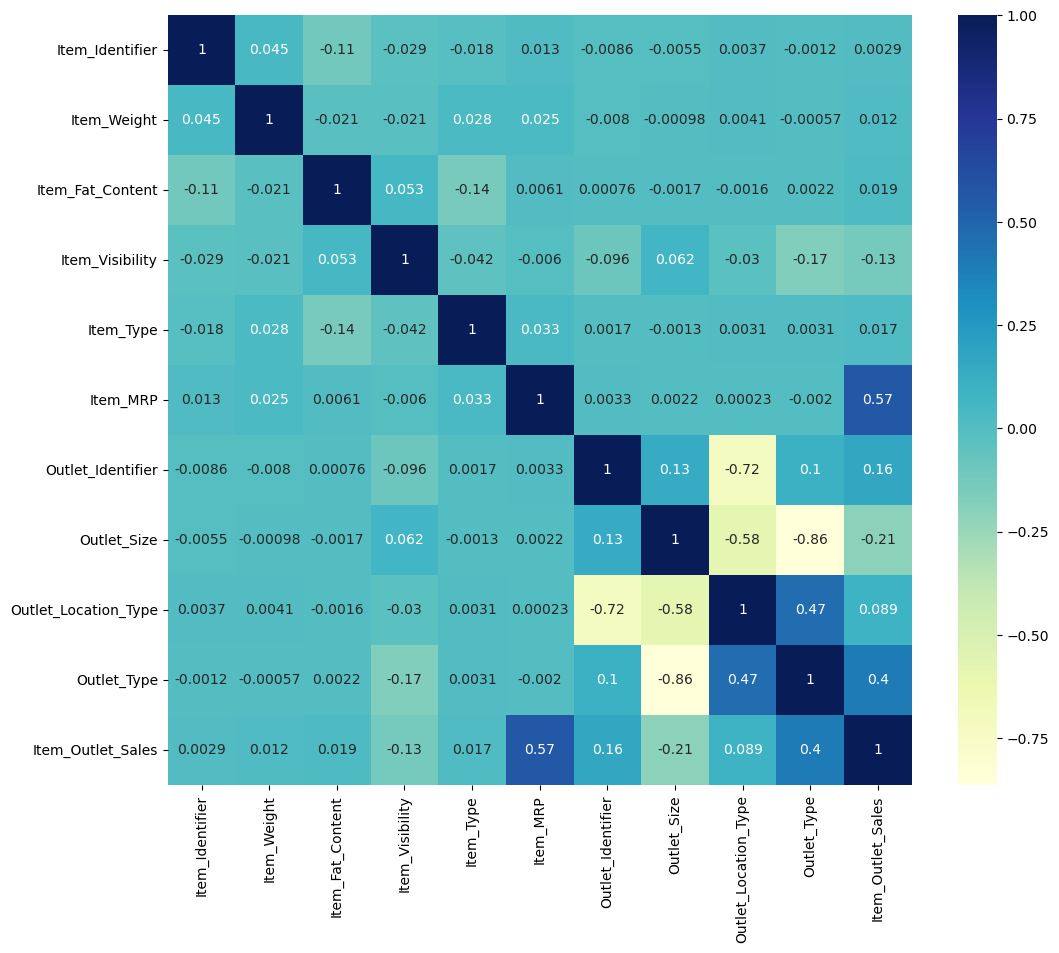

In [51]:
plt.figure(figsize=(12,10))
sns.heatmap(correle, cmap="YlGnBu", annot=True)
plt.show()

## Doing all these pre processing for test data too

In [52]:
test.loc[(test['Item_Fat_Content'] == "LF") | 
        (test['Item_Fat_Content']  == "low fat")
         , 'Item_Fat_Content'] = 'Low Fat'
test.loc[test['Item_Fat_Content'] == "reg", 'Item_Fat_Content'] = 'Regular'

In [53]:
# filling missing values 
test['Item_Weight']=test['Item_Weight'].fillna(test['Item_Weight'].mean())

In [54]:
mode_of_Outlet_Size = test.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc= lambda x: x.mode())
mode_of_Outlet_Size

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [55]:
test['Outlet_Size'] = np.where(test['Outlet_Type']=='Grocery Store', 'Small', test['Outlet_Size'])
test['Outlet_Size'] = np.where(test['Outlet_Type']=='Supermarket Type1', 'Small', test['Outlet_Size'])
test['Outlet_Size'] = np.where(test['Outlet_Type']=='Supermarket Type2', 'Medium', test['Outlet_Size'])
test['Outlet_Size'] = np.where(test['Outlet_Type']=='Supermarket Type3', 'Medium', test['Outlet_Size'])

In [56]:
test.Item_Visibility.replace(to_replace=0.000000,value=np.NaN,inplace=True)

In [57]:
test.Item_Visibility = test.Item_Visibility.fillna(train.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

In [58]:
test.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [59]:
test.loc[:,'Item_Identifier'] = le.fit_transform(test['Item_Identifier'])

test.loc[:,'Item_Fat_Content'] = le.fit_transform(test['Item_Fat_Content'])

test.loc[:,'Item_Type'] = le.fit_transform(test['Item_Type'])

test.loc[:,'Outlet_Identifier'] = le.fit_transform(test['Outlet_Identifier'])

test.loc[:,'Outlet_Size'] = le.fit_transform(test['Outlet_Size'])

test.loc[:,'Outlet_Location_Type'] = le.fit_transform(test['Outlet_Location_Type'])

test.loc[:,'Outlet_Type'] = le.fit_transform(test['Outlet_Type'])

In [60]:
test = test.drop(['Outlet_Establishment_Year'], axis=1)

#### Splitting Independent and Dependent Features

In [61]:
x=train.drop('Item_Outlet_Sales',axis=1)

In [62]:
y=train['Item_Outlet_Sales']

In [106]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=123)

## 3. Model building and evaluation

### 1. Linear Regression

In [107]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [108]:
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

In [109]:
from sklearn.metrics import mean_squared_error, r2_score 

In [110]:
mean_squared_error(y_test, y_pred)

1241919.5770890696

In [111]:
r2_score(y_test, y_pred)

0.5661916924833768

In [112]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1114.4144548098207


### 2. DecisionTree Regressor

In [113]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=45,max_depth=15)

In [114]:
tree.fit(x_train, y_train)
y_pred=tree.predict(x_test)

In [115]:
mean_squared_error(y_test, y_pred)

1922095.9112859068

In [116]:
r2_score(y_test, y_pred)

0.32860292281248127

In [117]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1386.3967366110996


### 3. Random Forest Regressor

In [118]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor(random_state=45,max_depth=16,n_estimators=300)

In [119]:
forest.fit(x_train, y_train)
y_pred=forest.predict(x_test)

In [120]:
mean_squared_error(y_test, y_pred)

1294340.4394839094

In [121]:
r2_score(y_test, y_pred)

0.5478808404655926

In [122]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1137.6908365122351


### 4. Lasso Regression

In [123]:
from sklearn.linear_model import LassoCV
lasso = LassoCV()

In [124]:
lasso.fit(x_train, y_train)
y_pred=lasso.predict(x_test)

In [125]:
mean_squared_error(y_test, y_pred)

1416039.9618048207

In [126]:
r2_score(y_test, y_pred)

0.5053706290335767

In [127]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1189.9747736001889


### 5. XG Boost Regression

In [128]:
from xgboost import XGBRegressor

In [129]:
xgb = XGBRegressor()

In [130]:
xgb.fit(x_train, y_train)
y_pred=xgb.predict(x_test)

In [131]:
mean_squared_error(y_test, y_pred)

1396003.896690441

In [132]:
r2_score(y_test, y_pred)

0.5123693201379835

In [133]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1181.5260880278695


### 6. Gradient Boosting Regressor

In [134]:
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

In [135]:
gbt.fit(x_train, y_train)
y_pred = gbt.predict(x_test)

In [136]:
mean_squared_error(y_test, y_pred)

1149437.3849238213

In [137]:
r2_score(y_test, y_pred)

0.5984961540594391

In [138]:
print("Root Mean Squared Error (RMSE): {}".format(mean_squared_error(y_test, y_pred, squared = False)))

Root Mean Squared Error (RMSE): 1072.1181767528342


## Cross-validation

In [139]:
from sklearn.model_selection import cross_validate

In [140]:
#cv=5 means 5 fold cross validation
cvs = cross_validate(lr,x,y,cv=5)
cvs['test_score'].mean()

0.5600642005409118

In [141]:
cvs = cross_validate(tree,x,y,cv=5)  
cvs['test_score'].mean()

0.32734892165044327

In [142]:
cvs = cross_validate(forest,x,y,cv=5)  
cvs['test_score'].mean()

0.5590071232454524

In [143]:
cvs = cross_validate(lasso,x,y,cv=5)  
cvs['test_score'].mean()

0.4954306467981288

In [144]:
cvs = cross_validate(xgb,x,y,cv=5)  
cvs['test_score'].mean()

0.5201724919640858

In [145]:
cvs = cross_validate(gbt,x,y,cv=5)  
cvs['test_score'].mean()

0.5921204838640483

## 4. Predictions

In [146]:
test_pred = tree.predict(test)

In [147]:
test_pred

array([1485.62173333, 1371.68116   ,  422.1172    , ..., 1943.36724124,
       3788.02067818, 1345.38452593])

In [148]:
ss['Item_Outlet_Sales'] = test_pred
ss.to_csv('bigmart_tree.csv',index = False)
ss.head()

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1485.621733
1,FDW14,OUT017,1371.681160
2,NCN55,OUT010,422.117200
3,FDQ58,OUT017,2330.446330
4,FDY38,OUT027,9158.079000
